In [2]:
from detector import CornerDetector
import cv2
import matplotlib.pyplot as plt

In [ ]:
detector = CornerDetector('../../../cccdYoloV8.pt')
detector.device_info()

Model summary: 129 layers, 3,012,603 parameters, 0 gradients, 8.2 GFLOPs
Is GPU available?: False
GPU count: 0


In [4]:
IMG_PATH = "../../../cccd/img1037.jpg"

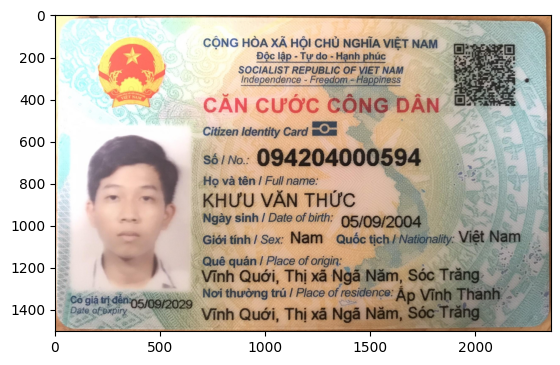

In [5]:
img = cv2.imread(IMG_PATH)
plt.imshow(img[:,:,::-1])

In [8]:
results = detector.predict(IMG_PATH)


image 1/1 c:\Users\admin\Desktop\CV_Project\src\modules\fields\..\..\..\cccd\img1037.jpg: 416x640 1 id, 1 full_name, 1 date_of_birth, 1 sex, 1 nationality, 1 place_of_origin, 2 place_of_residences, 1 date_of_expiry, 1 qr_code, 492.1ms
Speed: 6.3ms preprocess, 492.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)


In [9]:
for result in results:
    print(result.boxes) 

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 7., 2., 0., 8., 3., 1., 6., 5., 6.])
conf: tensor([0.9608, 0.9133, 0.9058, 0.8900, 0.8371, 0.8223, 0.7951, 0.7643, 0.7436, 0.5052])
data: tensor([[1.8944e+03, 9.8975e+02, 2.2388e+03, 1.1225e+03, 9.6084e-01, 4.0000e+00],
        [3.4112e+02, 1.3336e+03, 6.7099e+02, 1.4263e+03, 9.1326e-01, 7.0000e+00],
        [1.3324e+03, 9.3062e+02, 1.7801e+03, 1.0333e+03, 9.0581e-01, 2.0000e+00],
        [9.3285e+02, 6.0163e+02, 1.7871e+03, 7.4886e+02, 8.9005e-01, 0.0000e+00],
        [1.8797e+03, 1.2049e+02, 2.2021e+03, 4.4945e+02, 8.3714e-01, 8.0000e+00],
        [1.0923e+03, 1.0084e+03, 1.3059e+03, 1.1192e+03, 8.2232e-01, 3.0000e+00],
        [6.7836e+02, 8.2497e+02, 1.4599e+03, 9.3605e+02, 7.9509e-01, 1.0000e+00],
        [1.5954e+03, 1.2769e+03, 2.1525e+03, 1.3819e+03, 7.6434e-01, 6.0000e+00],
        [6.7955e+02, 1.1949e+03, 2.0656e+03, 1.2989e+03, 7.4359e-01, 5.0000e+00],
        [6.8081e+02, 1.3622e+03, 2.0795e+03, 1.49

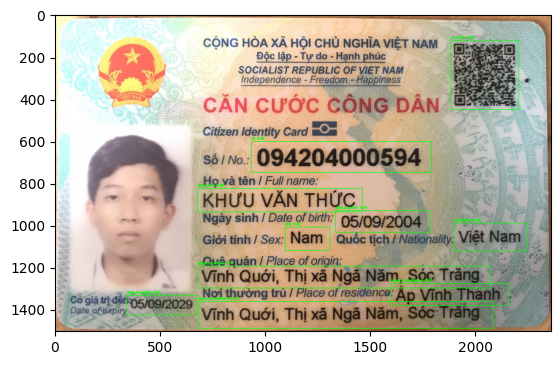

In [10]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Lấy toạ độ (x1, y1, x2, y2)
        confidence = box.conf[0].item()  # Lấy độ chính xác
        class_id = int(box.cls[0])  # Lấy ID của class
        label = f"{detector.get_model().names[class_id]}: {confidence:.2f}"  # Tạo label

        # Vẽ bounding box lên ảnh
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Màu xanh lá, độ dày 2px
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.imshow(img[:,:,::-1])